In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

In [83]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [84]:
# pip install requests

In [85]:
def get_city_name(zipcode):
    try:
        response = requests.get(f'http://api.zippopotam.us/us/{zipcode}')
        if response.status_code == 200:
            data = response.json()
            city_name = data['places'][0]['place name']
            return city_name
        else:
            return f"Error: Unable to retrieve data for ZIP code {zipcode}."
    except Exception as e:
        return f"Exception occurred: {e}"

In [86]:
print(get_city_name(df['ZIP Code'][5]))

San Diego


In [87]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [88]:
df.drop(['ID'] , axis = 1 , inplace = True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [90]:
df['Experience'] = df['Experience'].abs()

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [92]:
#Correcting "CCAvg" column : we multiply 'CCAvg' by 12 so we can have the annual amount like the 'Income' column

df['CCAvg'] = df['CCAvg'].astype(float)*12
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


In [93]:
# df['City'] = df['ZIP Code'].apply(get_city_name)
# df

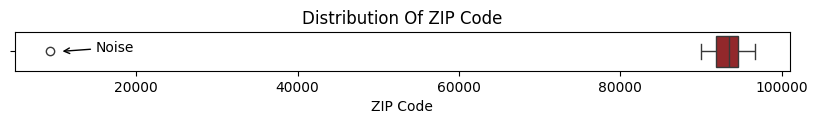

In [94]:
plt.figure(figsize = (10,0.5))
sns.boxplot(x = df['ZIP Code'] , color = '#A4161A' , linewidth = 1)
plt.annotate('Noise', xy=(10500,0), xytext=(15000,0), arrowprops=dict(facecolor='#f7c59f' , arrowstyle='->'))
plt.title("Distribution Of ZIP Code")
plt.show()

In [95]:
#Drop the noise :  It is clear from the zip code distribution that we have a noise and that address doesn't belong to this dataset, so we drop it.

df = df[df["ZIP Code"] > 10000]
df.reset_index(inplace = True , drop=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4995,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4996,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4997,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


In [96]:
discrete = ['Family' , 'Education' ,'Personal Loan' , 'Securities Account' , 'CD Account' , 'Online' , 'CreditCard']
continuous = ['Age' , 'Experience', 'Income', 'CCAvg' , 'Mortgage']

#### Checking for noise in other continuous columns :


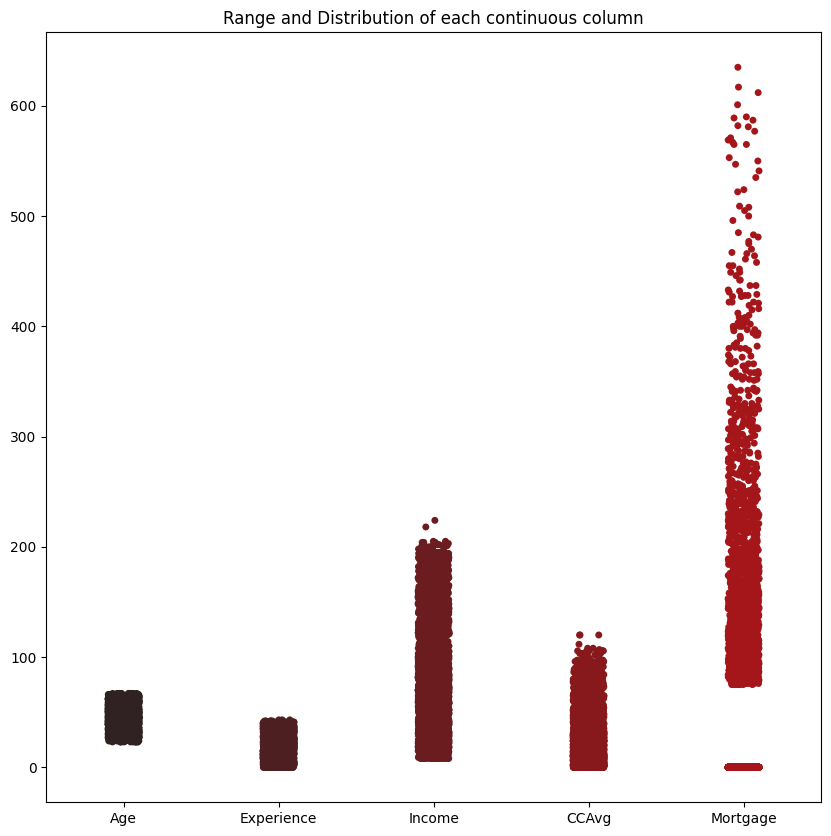

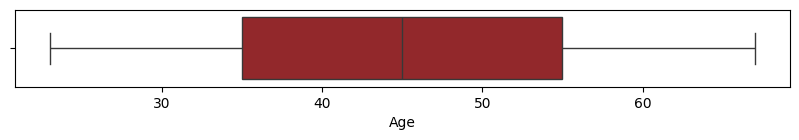

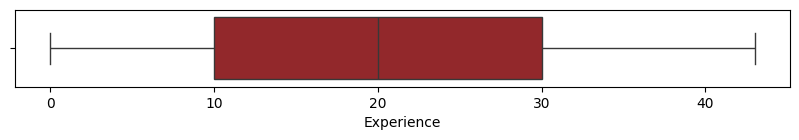

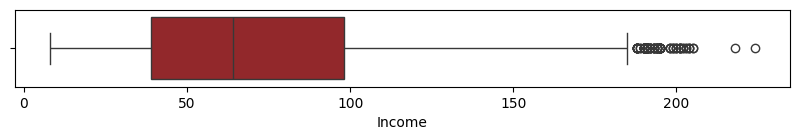

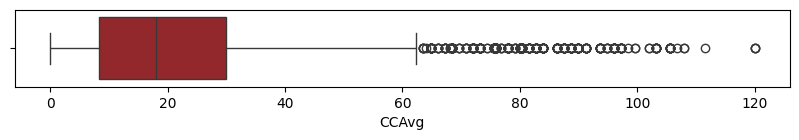

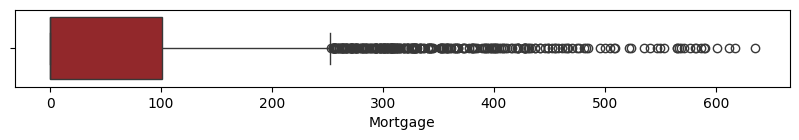

In [97]:
#Ploting for distribution and range of each column
plt.figure(figsize = (10,10))
plt.title("Range and Distribution of each continuous column")
df_cont = df[continuous]
sns.stripplot( data = df_cont  , palette='dark:#A4161A' )
plt.show()

#Box-plot of each column
for i in continuous :
    plt.figure(figsize = (10,1))
    sns.boxplot(x = df[i] , color = '#A4161A' , linewidth = 1)
    plt.show()

#### Distribution Age and Experience are very similar and they are probaly correlated.

#### The majority of CCAvg and Income values are in a certain range but the also have some outlieirs.

#### 'Mortgage' column has a lots of 0 value and it also has a wider range and less density.


In [98]:
# pip install geocode

In [99]:
import pgeocode

zip_codes = df["ZIP Code"].values.astype('str').tolist()
nomi = pgeocode.Nominatim('us')
us_code = nomi.query_postal_code(zip_codes)
us_code

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,91107,US,Pasadena,California,CA,Los Angeles,37.0,NaN,NaN,34.1510,-118.0889,4.0
1,90089,US,Los Angeles,California,CA,Los Angeles,37.0,NaN,NaN,33.7866,-118.2987,4.0
2,94720,US,Berkeley,California,CA,Alameda,1.0,NaN,NaN,37.8738,-122.2549,4.0
3,94112,US,San Francisco,California,CA,City and County of San Francisco,75.0,NaN,NaN,37.7195,-122.4411,4.0
4,91330,US,Northridge,California,CA,Los Angeles,37.0,NaN,NaN,34.2283,-118.5368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,92697,US,Irvine,California,CA,Orange,59.0,NaN,NaN,33.6485,-117.8387,4.0
4995,92037,US,La Jolla,California,CA,San Diego,73.0,NaN,NaN,32.8455,-117.2521,4.0
4996,93023,US,Ojai,California,CA,Ventura,111.0,NaN,NaN,34.4451,-119.2565,4.0
4997,90034,US,Los Angeles,California,CA,Los Angeles,37.0,NaN,NaN,34.0290,-118.4005,4.0


#### Adding zipcodes to the df with citynames


In [100]:
us_code_renamed = us_code.rename(columns={'place_name':'City'})
df = pd.concat([df,us_code_renamed.City], axis=1)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,City
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Pasadena
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Irvine
4995,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,La Jolla
4996,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ojai
4997,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles


In [101]:
df.isna().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
City                  40
dtype: int64

In [102]:
df[df.City.isna()]['ZIP Code'].unique()

array([92717, 92634, 96651, 92709], dtype=int64)

as we can see, 40 adresses that are belong to these zip codes, are unknown. so with searching these zip codes on the internet, three of them were found and got replaced by their city name but one of them was not found, so we droped it


In [103]:
df.loc[df['ZIP Code']==92717, 'City'] = 'Irvine'
df.loc[df['ZIP Code']==92634, 'City'] = 'Fullerton'
df.loc[df['ZIP Code']==92709, 'City'] = 'Irvine'

In [104]:
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,City
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Pasadena
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Irvine
4989,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,La Jolla
4990,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ojai
4991,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles


In [105]:
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              465
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
City                  244
dtype: int64

### Visualization


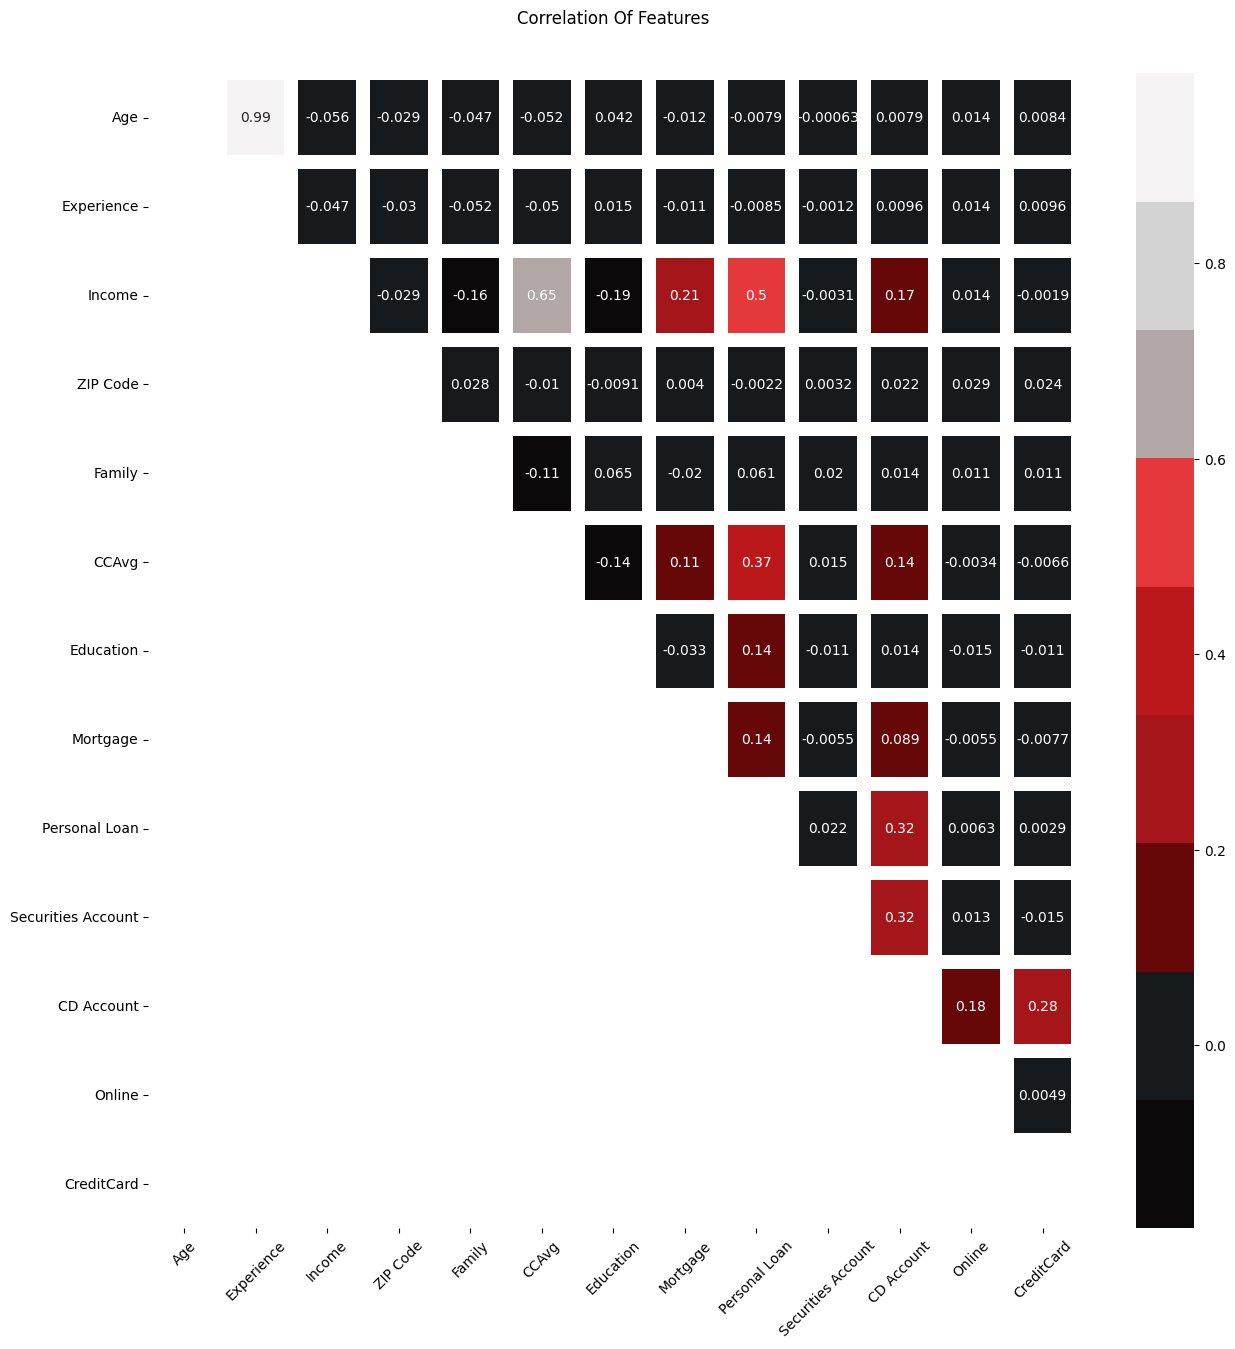

In [106]:
# Plotting the correlation between variables:

df1 = df.drop(columns = 'City')

corr_matrix = df1.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15,15))
colormap = [ '#f5f3f4' , '#d3d3d3' , '#b1a7a6' , '#e5383b' , '#ba181b' , '#a4161a' , '#660708' , '#161a1d' , '#0b090a']

colormap.reverse()

sns.heatmap(corr_matrix, cmap = colormap, annot=True, linewidths=10, mask=mask)

plt.title("Correlation Of Features\n\n")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


##### As we have assumed earlier, Age and Experience are highly correlated.

##### After that we can see that income and CCAvg are also correlated too.

##### Beside that we can't see any meaningfull correlations between features.


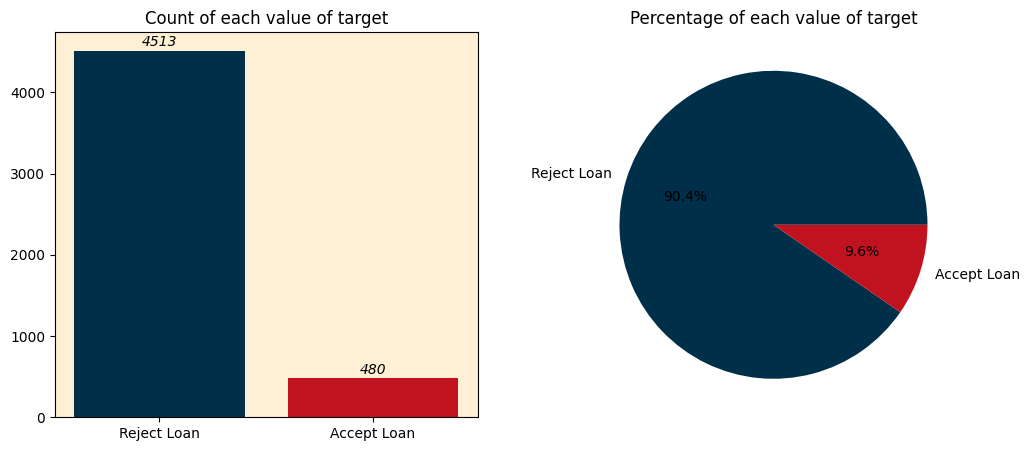

In [107]:
# Checking target distribution:

# Counting Number of each value
plt.figure(figsize = (12,5))
count = df1['Personal Loan'].value_counts()

# bar plot
plt.subplot(1, 2,1 ,facecolor = '#FDF0D5')
plt.title("Count of each value of target")

plt.bar(['Reject Loan', 'Accept Loan'], count.values, color=['#003049','#C1121F'])

for i, v in enumerate(count):
    plt.text(i, v+20, str(v), ha='center', va='bottom', fontstyle='oblique', fontsize=10)

# pie plot

plt.subplot(1,2,2,facecolor = '#FDF0D5')
plt.title('Percentage of each value of target')
plt.pie([df['Personal Loan'].value_counts()[0], df['Personal Loan'].value_counts()[1]],
        labels=['Reject Loan','Accept Loan'], autopct='%1.1f%%', colors=['#003049','#c1121F'])
plt.show()

In [108]:
# Seperating Discrete and continious columns:

discrete = ['Family' , 'Education' , 'Securities Account' , 'CD Account' , 'Online' , 'CreditCard']
continuous = ['Age' , 'Experience', 'Income', 'CCAvg' , 'Mortgage']

df_accept = df1[df1['Personal Loan'] == 1]
df_reject = df1[df1['Personal Loan'] == 0]

df1['Personal Loan'] = df1['Personal Loan'].astype(str)

C:\Users\Manideep S\AppData\Local\Temp\ipykernel_26364\4055826243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df1, x = col , palette = [  '#ef233c' , '#2b2d42' , '#90e0ef' , '#8d99ae'  , '#d80032']) #Plottting
C:\Users\Manideep S\AppData\Local\Temp\ipykernel_26364\4055826243.py:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data = df1, x = col , palette = [  '#ef233c' , '#2b2d42' , '#90e0ef' , '#8d99ae'  , '#d80032']) #Plottting
C:\Users\Manideep S\AppData\Local\Temp\ipykernel_26364\4055826243.py:32: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data = df1 , x=col , palette = [  '#ef233c' , '#2b2d42' , '#90e0ef' , '#8d99ae'  , '#d80032'] , hue = 'Personal Loan')
C:\Users\Manideep S\AppData\L

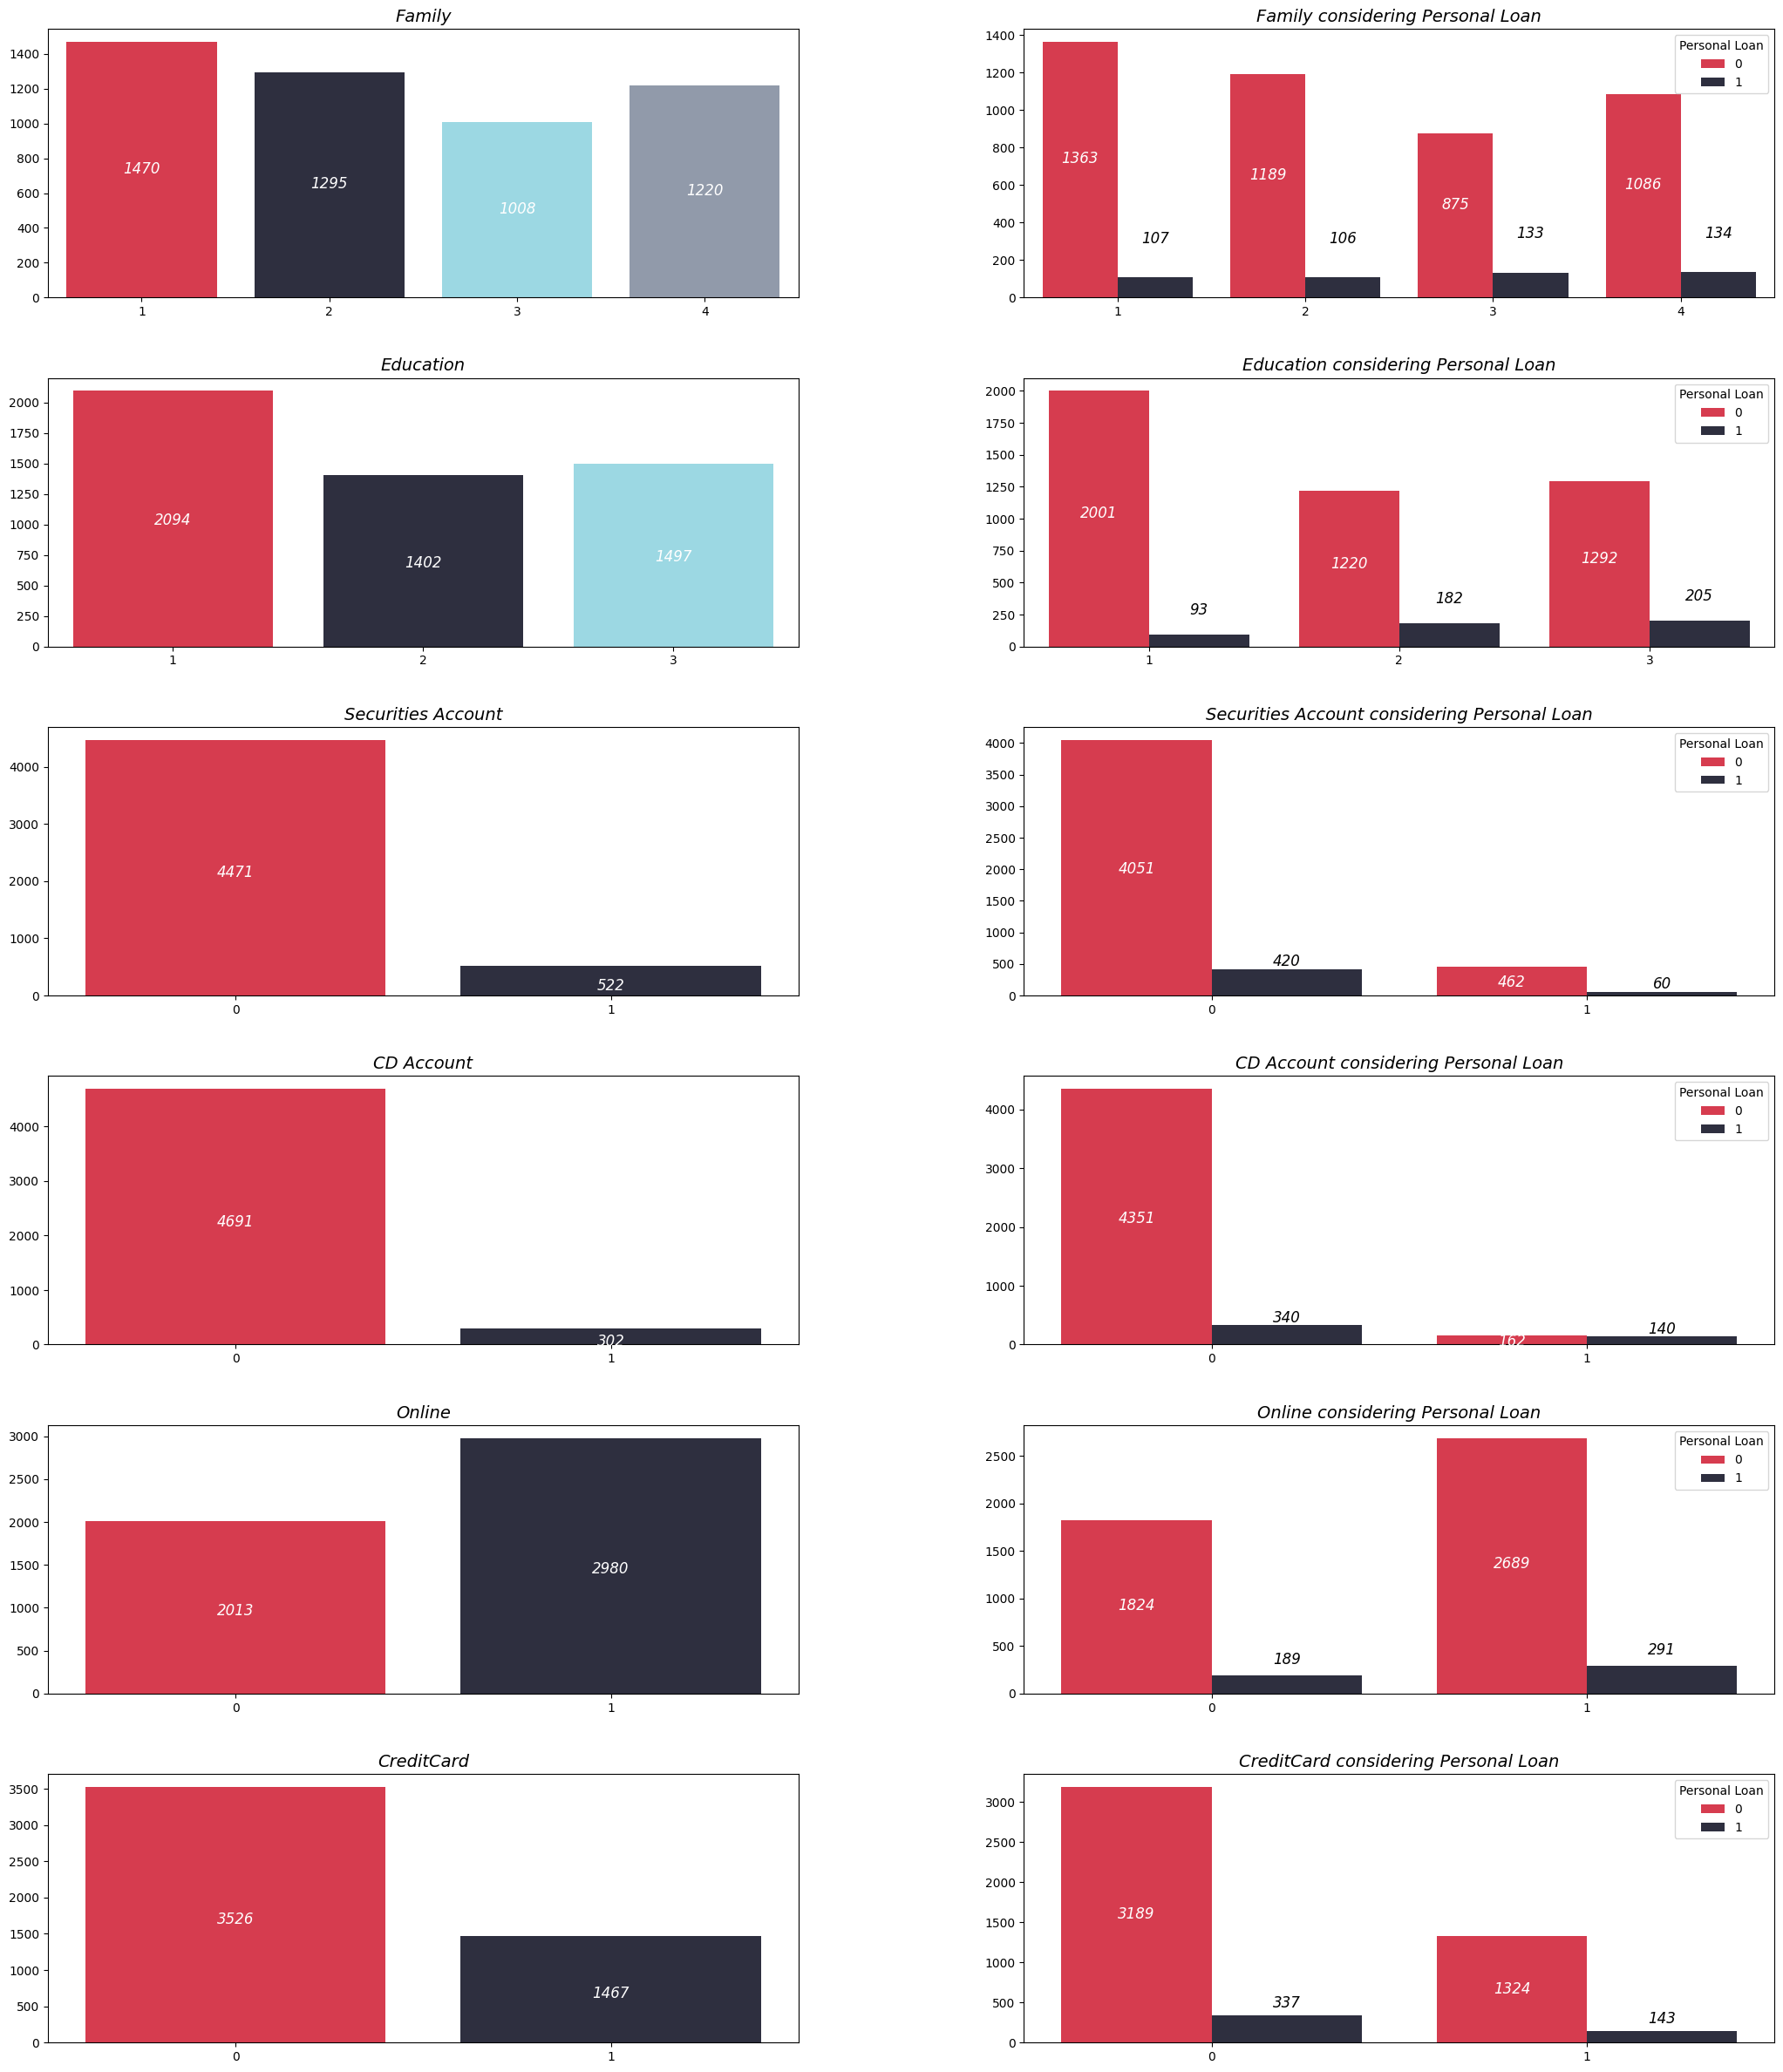

---------------------------------Pie Plots---------------------------------


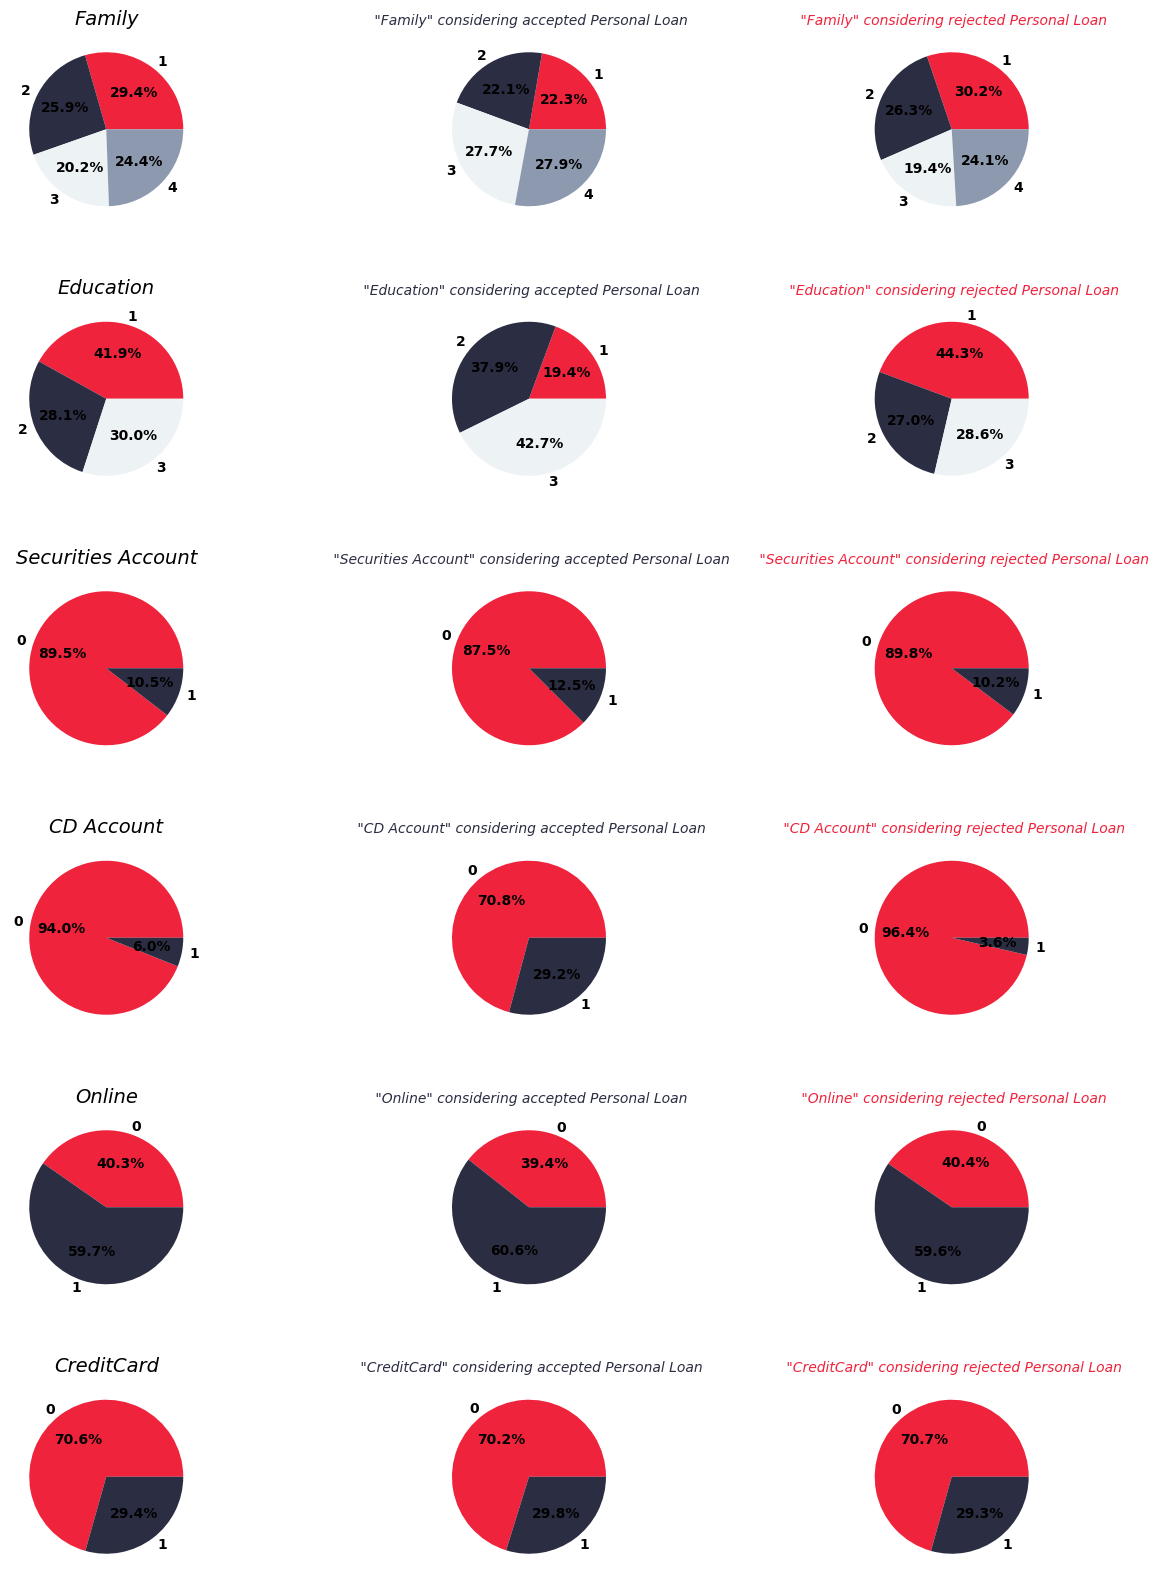

In [109]:
#Plotting the count of each discrete column in general and considering target :


plt.figure(figsize = (40,30))
n = 1
for col in discrete : #for each column
    
    #General count plot
    count = df1[col].value_counts() #counts of each value
    count.sort_index(inplace = True)
    
    #Plotting
    plt.subplot(6,3, n , facecolor = 'white')
    sns.countplot(data = df1, x = col , palette = [  '#ef233c' , '#2b2d42' , '#90e0ef' , '#8d99ae'  , '#d80032']) #Plottting 
    plt.title(col ,fontsize = 14 , fontstyle = "oblique")
    plt.xlabel("") 
    plt.ylabel("")
    
    for i , v in enumerate(count):
        plt.text(i , v/2 + 50 , str(v) , ha='center', va='top', fontstyle = "oblique" , fontsize=12, color = 'White') #Putting each bar value on the top
    
    
    #Count plot considering target('Personal Loan')
    
    count_accept = df_accept[col].value_counts() #Count of accepted loan
    count_accept.sort_index(inplace = True)
    count_reject = df_reject[col].value_counts() #Count of rejected loan
    count_reject.sort_index(inplace = True)
    
    #Second count plot
    plt.subplot(6,3, n+1 , facecolor = 'white')
    sns.countplot(data = df1 , x=col , palette = [  '#ef233c' , '#2b2d42' , '#90e0ef' , '#8d99ae'  , '#d80032'] , hue = 'Personal Loan')
    plt.title(f'{col} considering Personal Loan' , fontsize=14 , fontstyle = "oblique")
    plt.xlabel("") 
    plt.ylabel("")
    for i , v in enumerate(count_reject):
        plt.text(i-0.2 , v/2+100 , str(v) , ha='center', va='top', fontstyle = "oblique" , fontsize=12, color = 'White') #Putting each bar number on the top
    
    for i , v in enumerate(count_accept):
        plt.text(i+0.2 , v+250 , str(v) , ha='center', va='top', fontstyle = "oblique" , fontsize=12, color = 'black') #Putting each bar number on the top
    
    n+=3 # for subplot tracking
    
plt.subplots_adjust(wspace= 0.3, hspace=0.3) #space between subplots
plt.show()

print('-'*33 + 'Pie Plots' + '-'*33)

#Pie plot for proportion count of each value in categorical columns :

plt.figure(figsize=(20,20))

for n , col in enumerate(discrete) :
    count = df1[col].value_counts() #Counts of each value
    count.sort_index(inplace = True)
    
    count_accept = df_accept[col].value_counts() #Count of accepted loan
    count_accept.sort_index(inplace = True)
    
    count_reject = df_reject[col].value_counts() #Count of rejected loan
    count_reject.sort_index(inplace = True)
    
    #General pie plot
    plt.subplot(6 , 3 , (n*3)+1 , facecolor = 'white')
    plt.pie(count.tolist() ,  textprops={'fontsize': 10, 'fontweight': 'bold'} , 
        labels = count.index ,  autopct='%1.1f%%' , colors = [  '#ef233c' , '#2b2d42' ,  '#edf2f4' ,'#8d99ae'  , '#d80032'])
    plt.title(col ,fontsize=14 , fontstyle = "oblique")
    
    #Accepted loan pie plot
    plt.subplot(6 , 3 , (n*3)+2 , facecolor = 'white')
    plt.pie(count_accept.tolist() ,  textprops={'fontsize': 10, 'fontweight': 'bold'} , 
        labels = count_accept.index ,  autopct='%1.1f%%' , colors = [  '#ef233c' , '#2b2d42' ,  '#edf2f4' ,'#8d99ae'  , '#d80032'])
    plt.title(f' "{col}" considering accepted Personal Loan' , fontsize=10 , fontstyle = "oblique" , color = '#2b2d42')
    
    #Rejected loan pie plot
    plt.subplot(6 , 3 , (n*3)+3 , facecolor = 'white')
    plt.pie(count_reject.tolist() ,  textprops={'fontsize': 10, 'fontweight': 'bold'} , 
        labels = count_reject.index ,  autopct='%1.1f%%' , colors = [  '#ef233c' , '#2b2d42' ,  '#edf2f4' ,'#8d99ae'  , '#d80032'])
    plt.title(f' "{col}" considering rejected Personal Loan' , fontsize=10 , fontstyle = "oblique" , color = '#ef233c')
    
    
    n+=3
    
plt.subplots_adjust(wspace= -0.4, hspace=0.4) #space between subplots
plt.show()    

#### Considering both bar charts and pie plots, the number of family members are distributed evenly and larger families(3 and 4) accepted the offer a bit more.

##### Also we can see despite the number of educated persons are less the uneducated ones, they have accepted the loan offer more.

#### We can also see that Securities Account, Online and CreditCard are not really impactfull in customer's decision and their proportion considering only accepted loans, stays the same. it can be seen very clear specially in pie plots.

##### But in CD Account, we can see that if customer has CD, it is likely to accept the lo


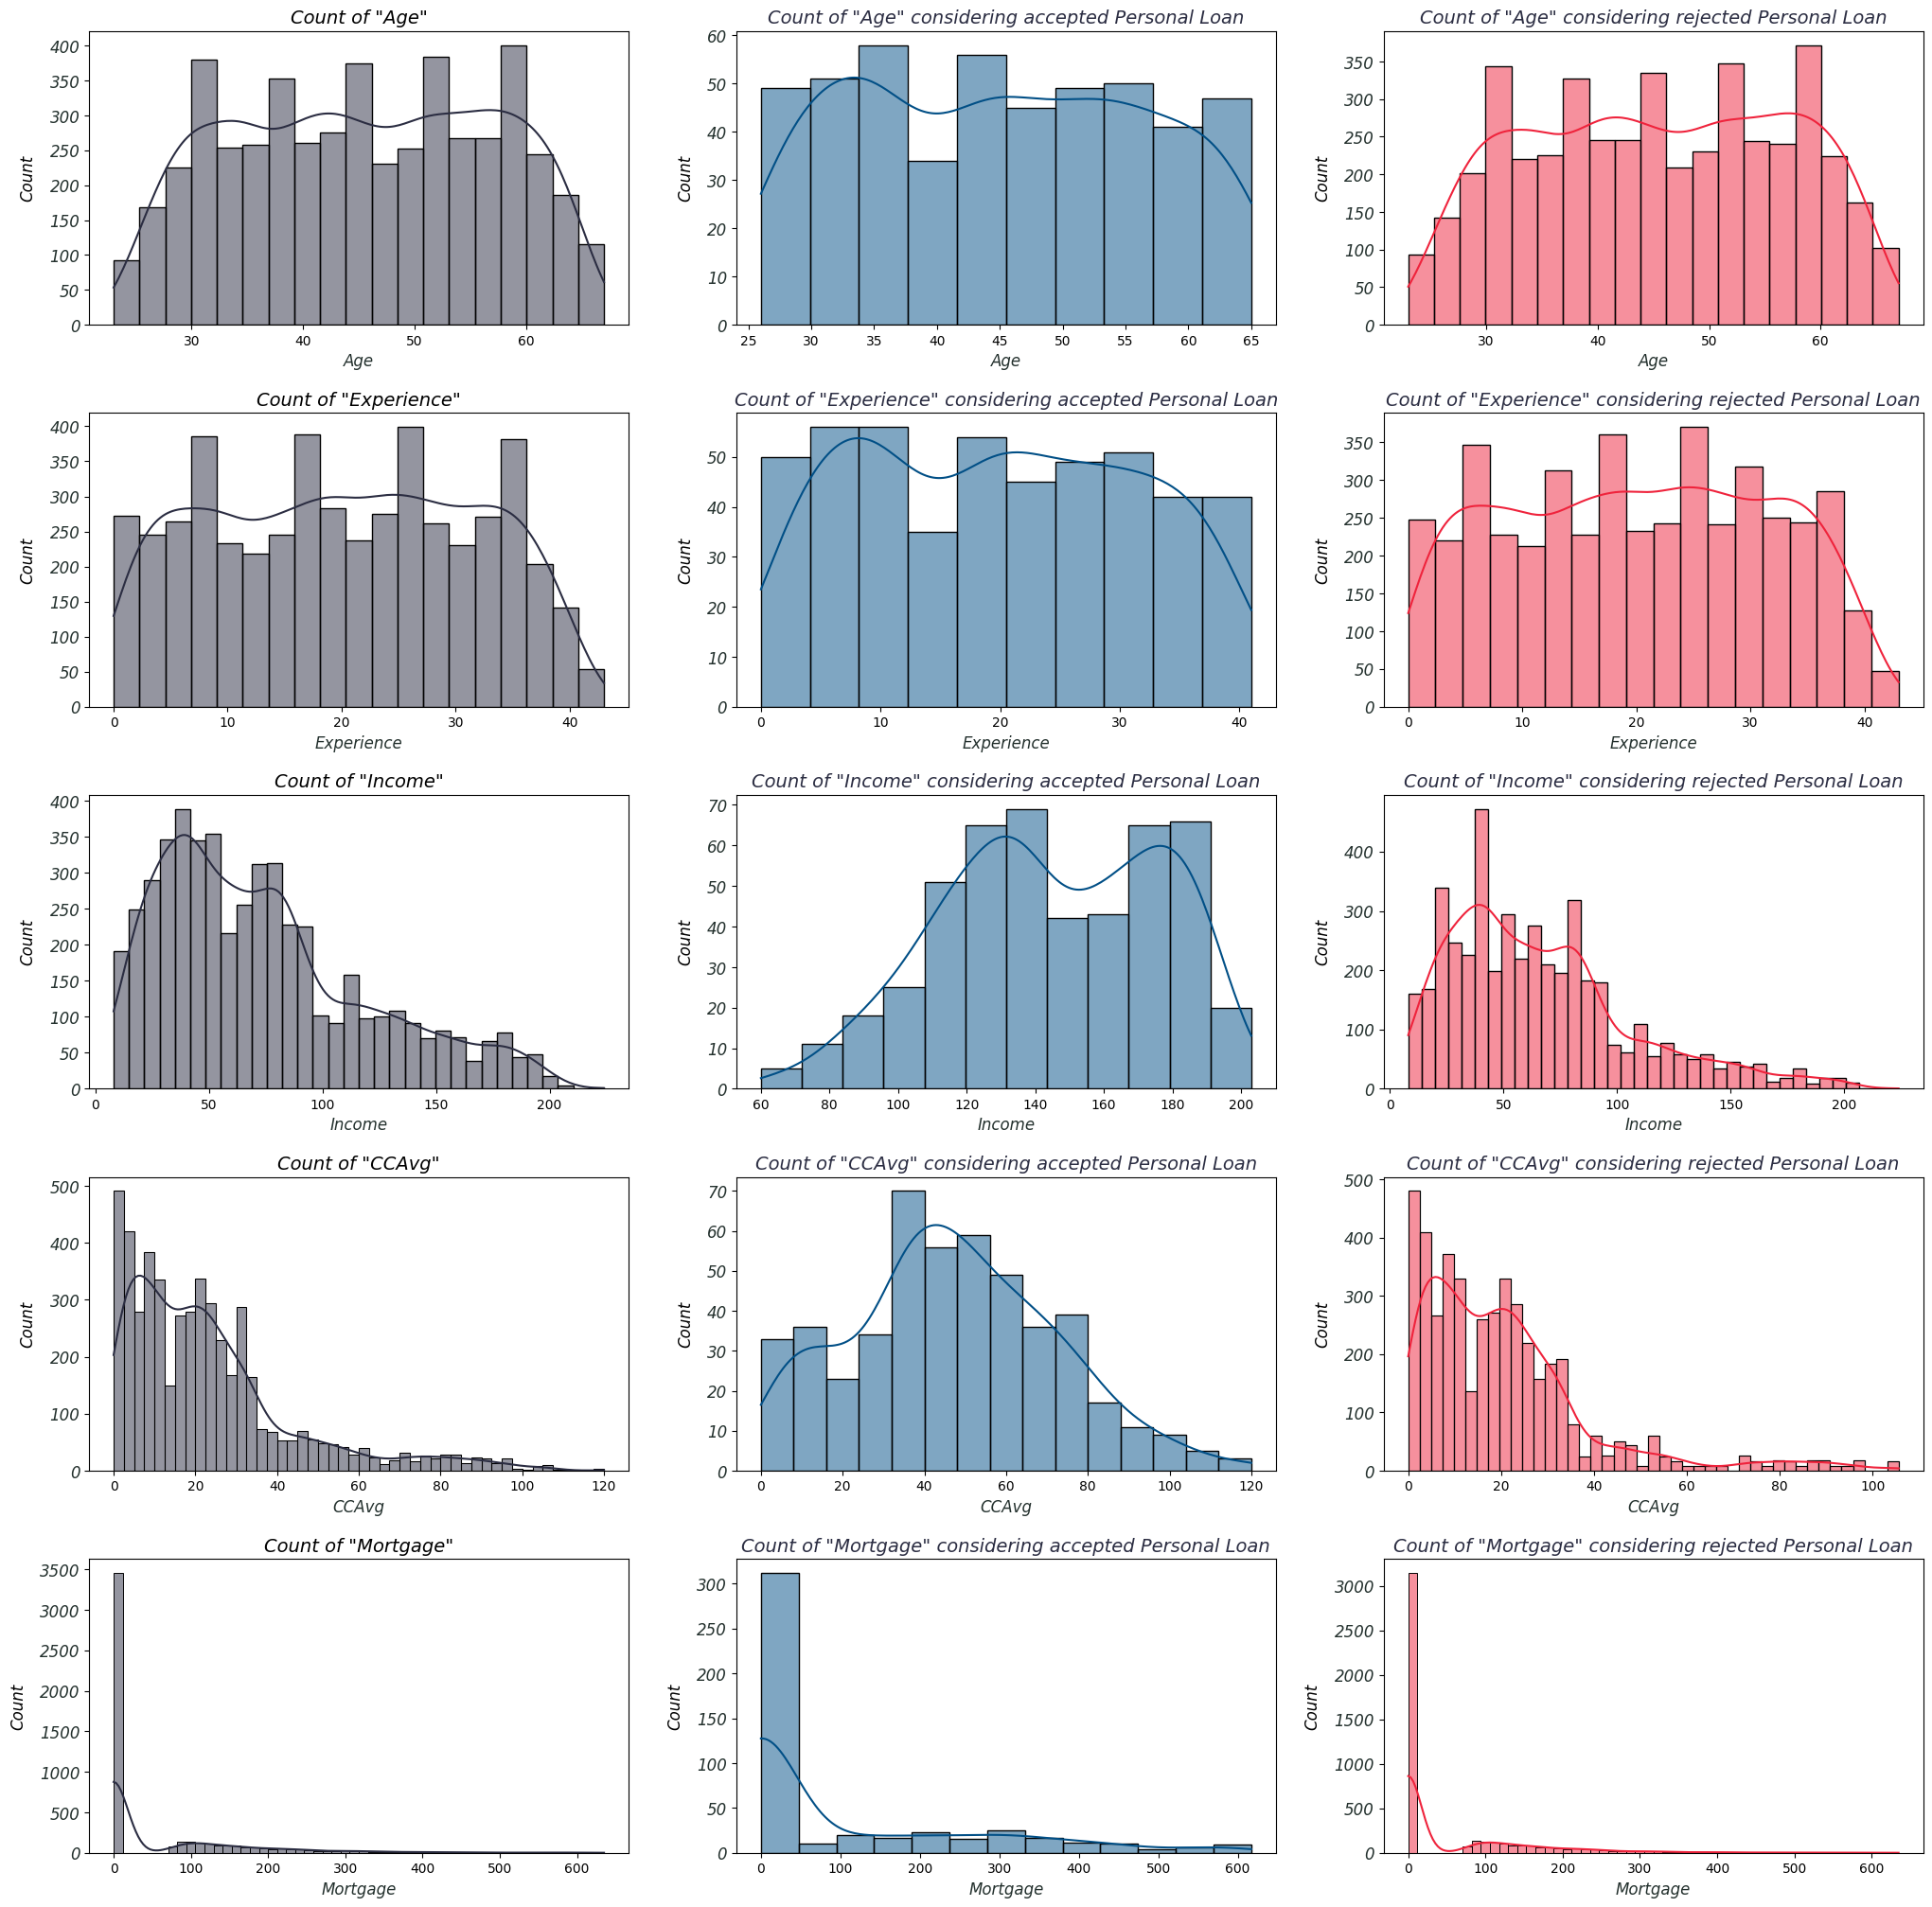

---------------------------------Distribution Plots---------------------------------


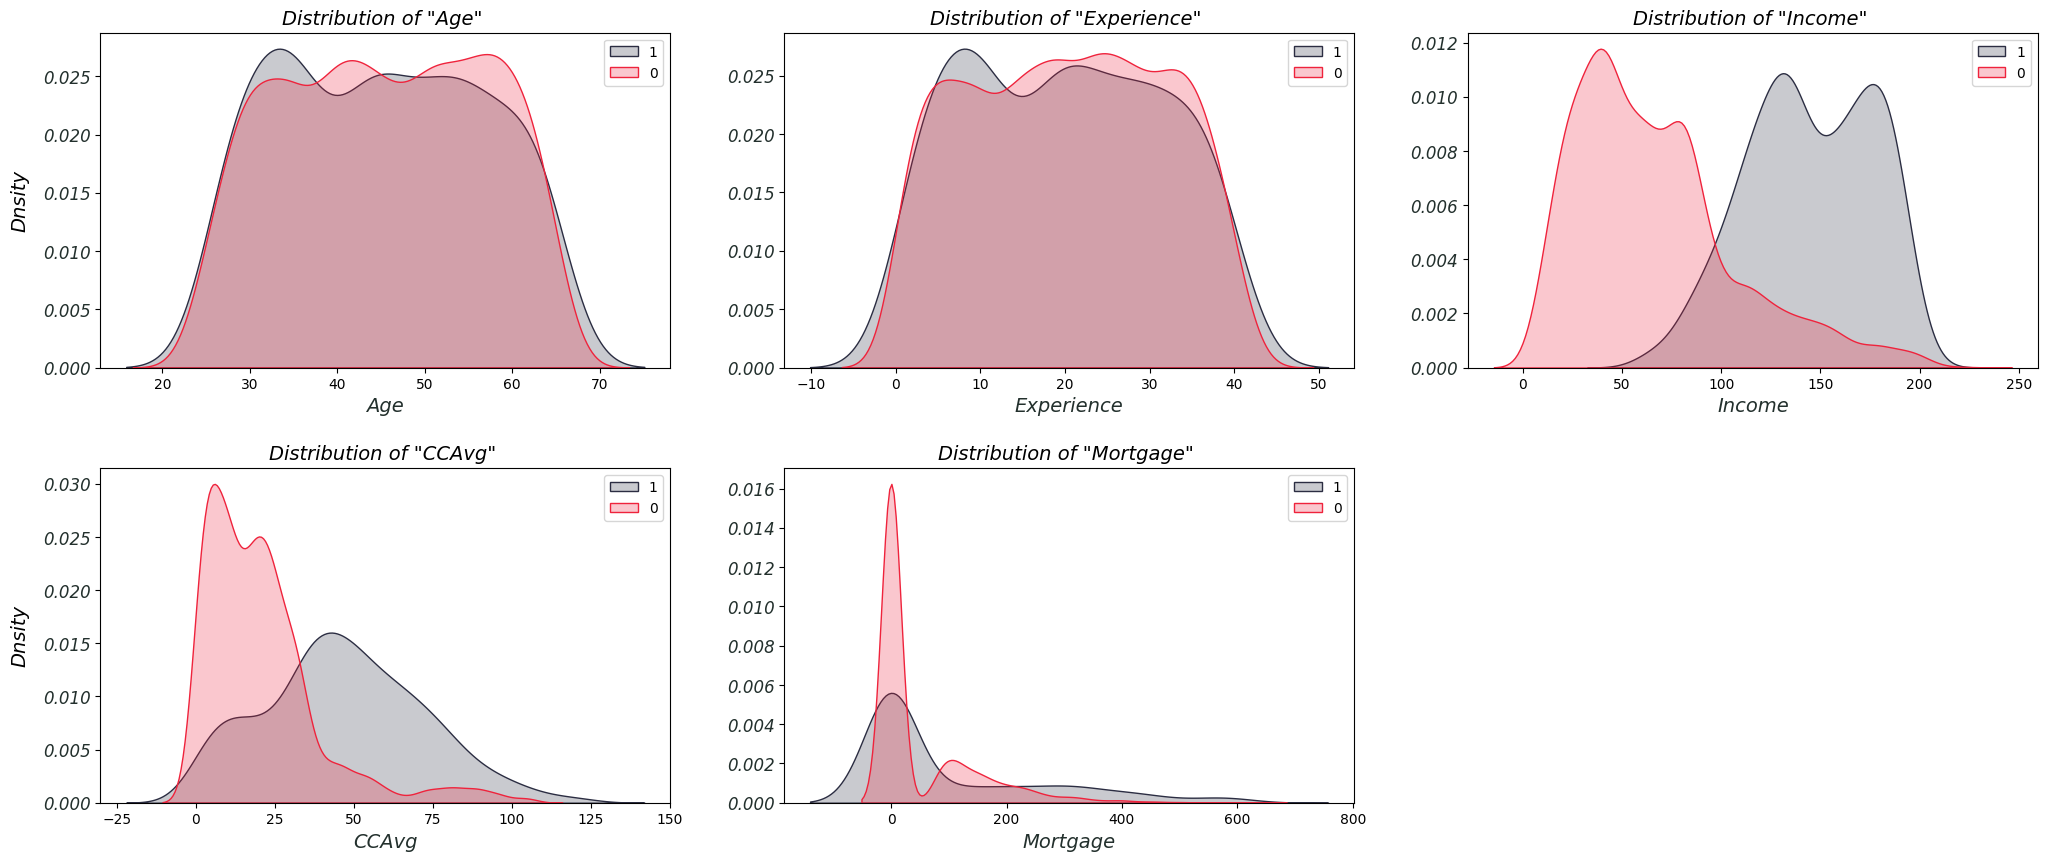

In [110]:
#Checking the distribution and count of continuous columns :

plt.figure(figsize=(25,25))
for n , col in enumerate(continuous) :

    #First general count plot
    plt.subplot(5 , 3 , (3*n)+1)
    sns.histplot(df[col] , kde=True , color = '#2b2d42')
    plt.title(f'Count of "{col}"' , fontsize=14, fontstyle = "oblique" )
    plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
    plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
    plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    
    #Second Plot considering accepted loans
    plt.subplot(5 , 3 , (n*3)+2)
    sns.histplot(df[df['Personal Loan'] == 1][col] , kde = True , color = '#014f86')
    plt.title(f'Count of "{col}" considering accepted Personal Loan' , fontsize=14, fontstyle = "oblique" , color = '#2b2d42')
    plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
    plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
    plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    
    #Tird  Plot considering rejected Loans
    plt.subplot(5 , 3 , (3*n)+3)
    sns.histplot(df[df['Personal Loan'] == 0][col] , kde = True , color = '#ef233c')
    plt.title(f'Count of "{col}" considering rejected Personal Loan' , fontsize=14, fontstyle = "oblique" , color = '#2b2d42')
    plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
    plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
    plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")

plt.subplots_adjust( hspace=0.3 )
plt.show()


print('-'*33 + 'Distribution Plots' + '-'*33)

#Distribution plots :

plt.figure(figsize=(25,10))
for i , col in enumerate(continuous) :
    plt.subplot(2,3,i+1)
    sns.kdeplot(df[df['Personal Loan'] == 1][col] , fill = True , color = '#2b2d42' , label = 1)
    sns.kdeplot(df[df['Personal Loan'] == 0][col] ,fill = True , color = '#ef233c' , label = 0)
    if i==1 or i==2 or i==4 :
        plt.ylabel("")
    else :
        plt.ylabel('Dnsity' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
    plt.xlabel(col , color = "#23302D" , fontsize=14, fontstyle = "oblique")    
    plt.title(f'Distribution of "{col}" ' , fontsize=14, fontstyle = "oblique" , color = 'black')
    plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    plt.legend()
plt.subplots_adjust( hspace=0.3 ) 
plt.show()

#### Age and Experience are distributed pretty normally both when the customers accepted loan and rejected it with minor differences in certain ages.

#### in income, with customers rejecting the loan, the cart is positively skewed like the combined chart, but when we consider only the customers that have accepted the loan the chart is negatively skewed so we can see that the customers with income higher than 100, are more likely to accept the loan.

#### in CCAvg we can see that in combined chart and chart with customers rejecting the loan, the charts are positively skewed while in chart with customers accepting the loan it is look normal

#### in mortgage we have a lots of 0 value so we can really about other values. because of that we look at that column above, deleting the 0 values.


Count of total :  4993
0 Mortgage : 3457
0<Mortgage :  1536


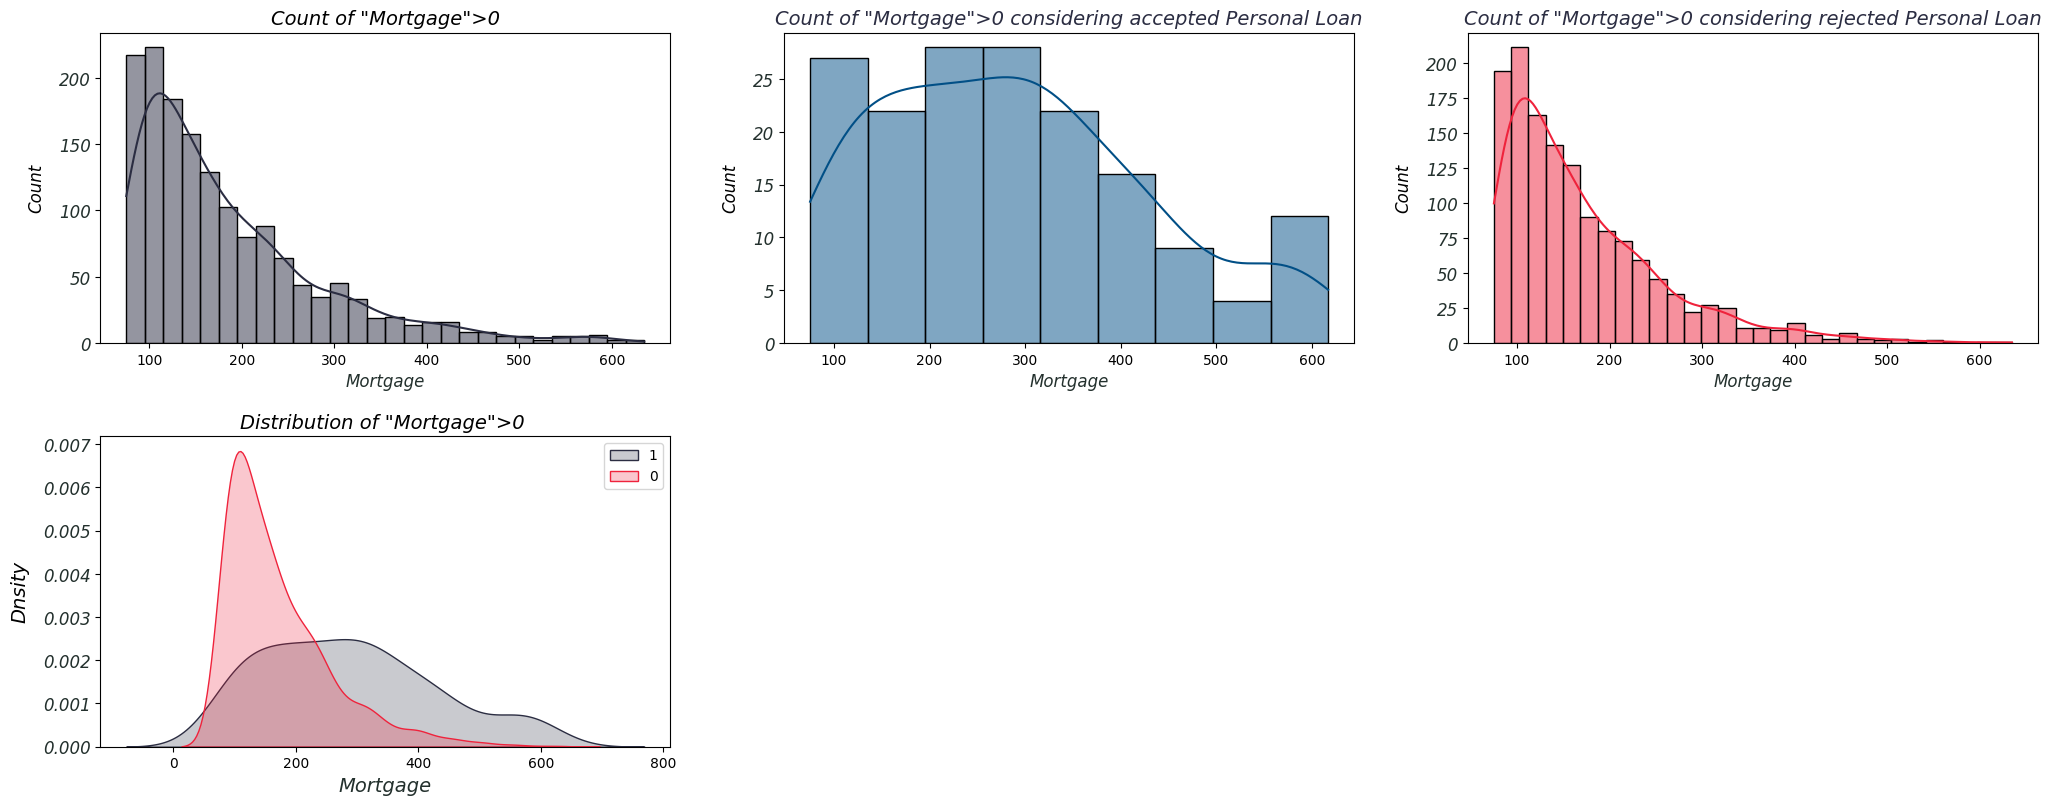

In [111]:
df1['Personal Loan'] = df1['Personal Loan'].astype(int)

#'Mortgage' column without the zeros :
df2 = df1[df1['Mortgage'] == 0]
count2 = df2['Mortgage'].value_counts()
df3 = df1[df1['Mortgage'] > 0]
count3 = df3['Mortgage'].value_counts()

#Count of values information
print('Count of total : ',df.shape[0])
print('0 Mortgage :' , count2[0])
print('0<Mortgage : ', df.shape[0]-count2[0])

col = 'Mortgage'

plt.figure(figsize=(25,25))

#First general count plot
plt.subplot(5 , 3 , 1)
sns.histplot(df3[col] , kde=True , color = '#2b2d42')
plt.title(f'Count of "{col}">0' , fontsize=14, fontstyle = "oblique" )
plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    
#Second Plot considering accepted loans
plt.subplot(5 , 3 , 2)
sns.histplot(df3[df3['Personal Loan'] == 1][col] , kde = True , color = '#014f86')
plt.title(f'Count of "{col}">0 considering accepted Personal Loan' , fontsize=14, fontstyle = "oblique" , color = '#2b2d42')
plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    
#Tird  Plot considering rejected Loans
plt.subplot(5 , 3 , 3)
sns.histplot(df3[df3['Personal Loan'] == 0][col] , kde = True , color = '#ef233c')
plt.title(f'Count of "{col}">0 considering rejected Personal Loan' , fontsize=14, fontstyle = "oblique" , color = '#2b2d42')
plt.xlabel(col , color = "#23302D" , fontsize=12, fontstyle = "oblique")
plt.ylabel('Count' , labelpad = 10 , fontsize=12,fontstyle = "oblique")
plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")


#Distribution plot
plt.subplot(5 ,3 ,4)
sns.kdeplot(df3[df3['Personal Loan'] == 1][col] , fill = True , color = '#2b2d42' , label = 1)
sns.kdeplot(df3[df3['Personal Loan'] == 0][col] ,fill = True , color = '#ef233c' , label = 0)
plt.ylabel('Dnsity' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
plt.xlabel(col , color = "#23302D" , fontsize=14, fontstyle = "oblique")    
plt.title(f'Distribution of "{col}">0 ' , fontsize=14, fontstyle = "oblique" , color = 'black')
plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
plt.legend()

plt.subplots_adjust( hspace=0.3 )
plt.show()

#### As we can see, beside the 0 values, it is pretty much just like CCAvg column, the combined and rejected chart are positively skewed. while the accepted chart is normal.


<Figure size 800x800 with 0 Axes>

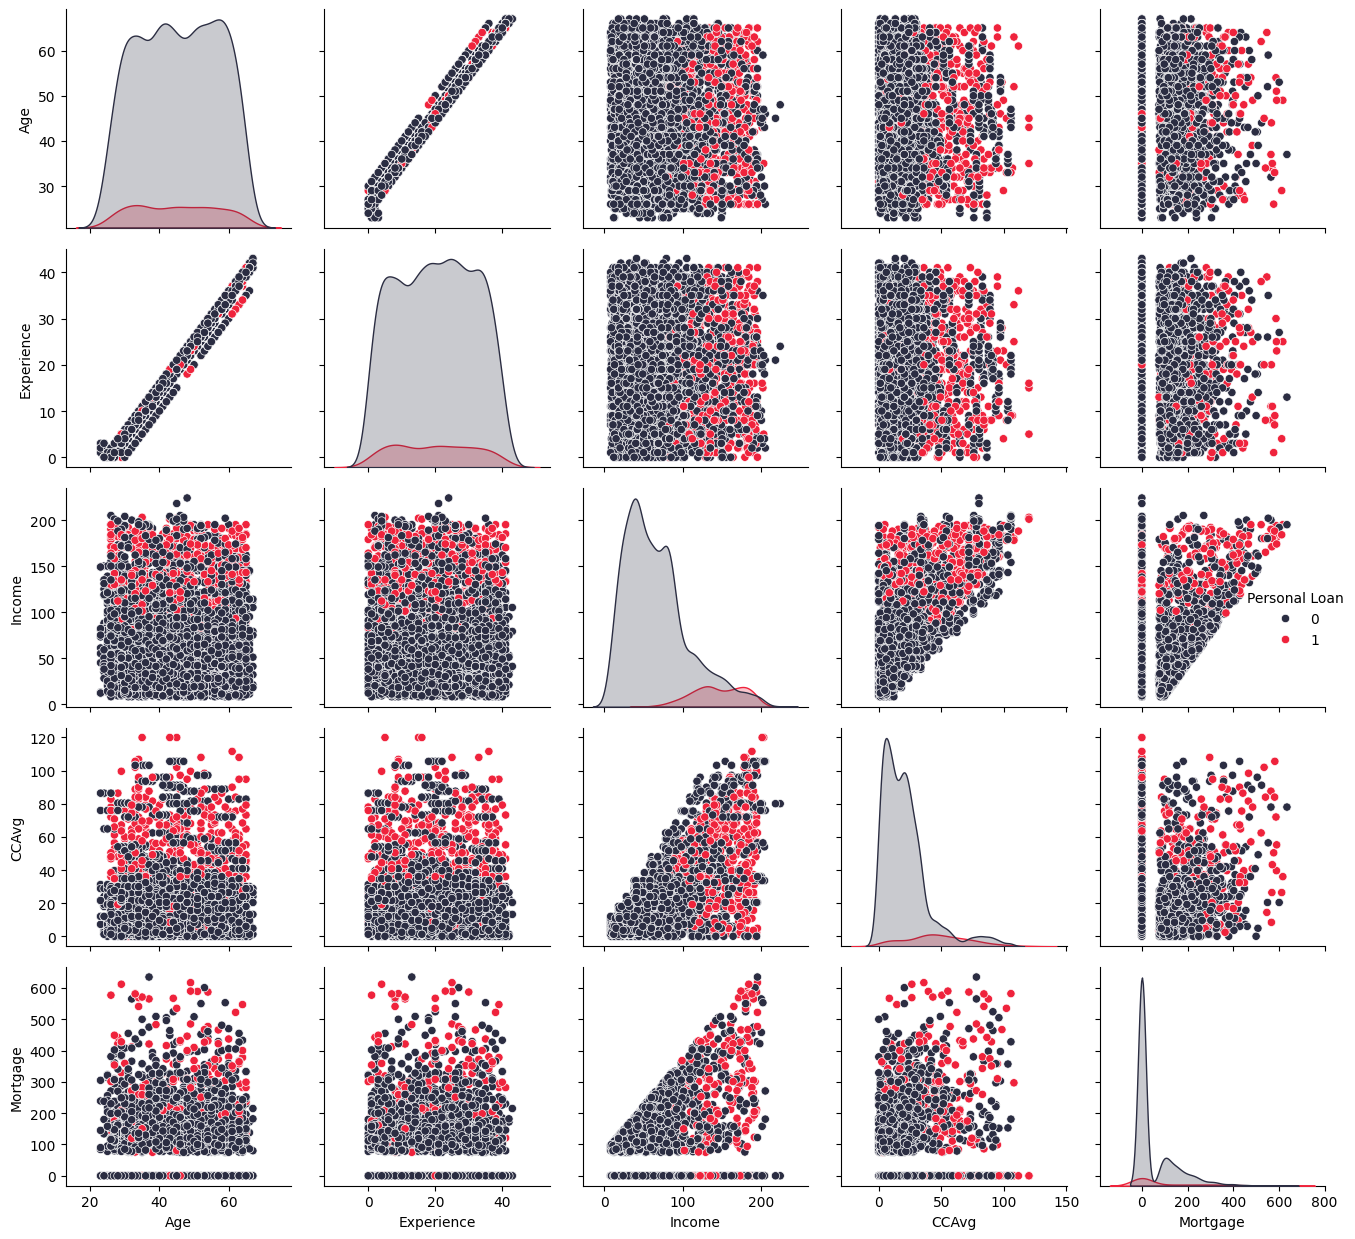

In [112]:
plt.figure(figsize=(8,8))
sns.pairplot(df1[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']] , hue='Personal Loan' , palette = ['#2b2d42' , '#ef233c' ])
plt.tight_layout()
plt.show()

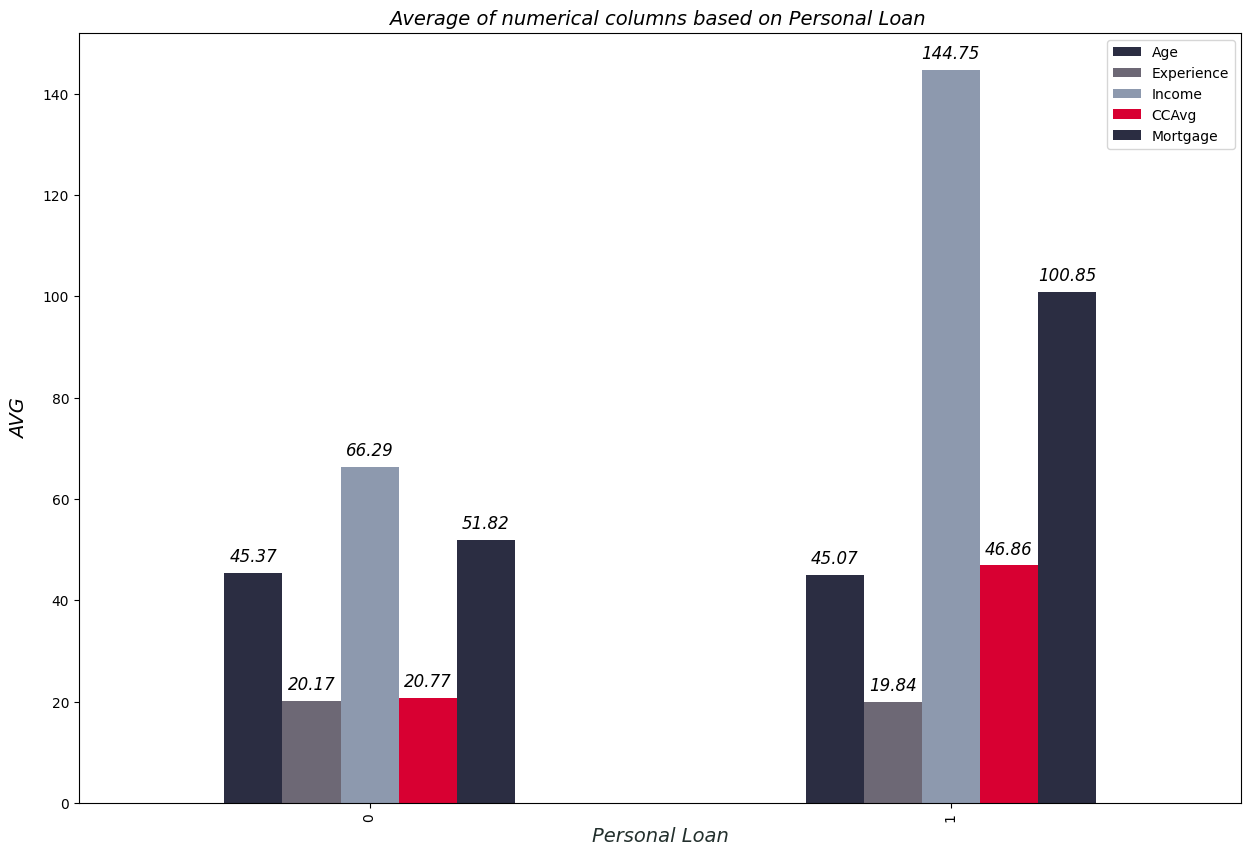

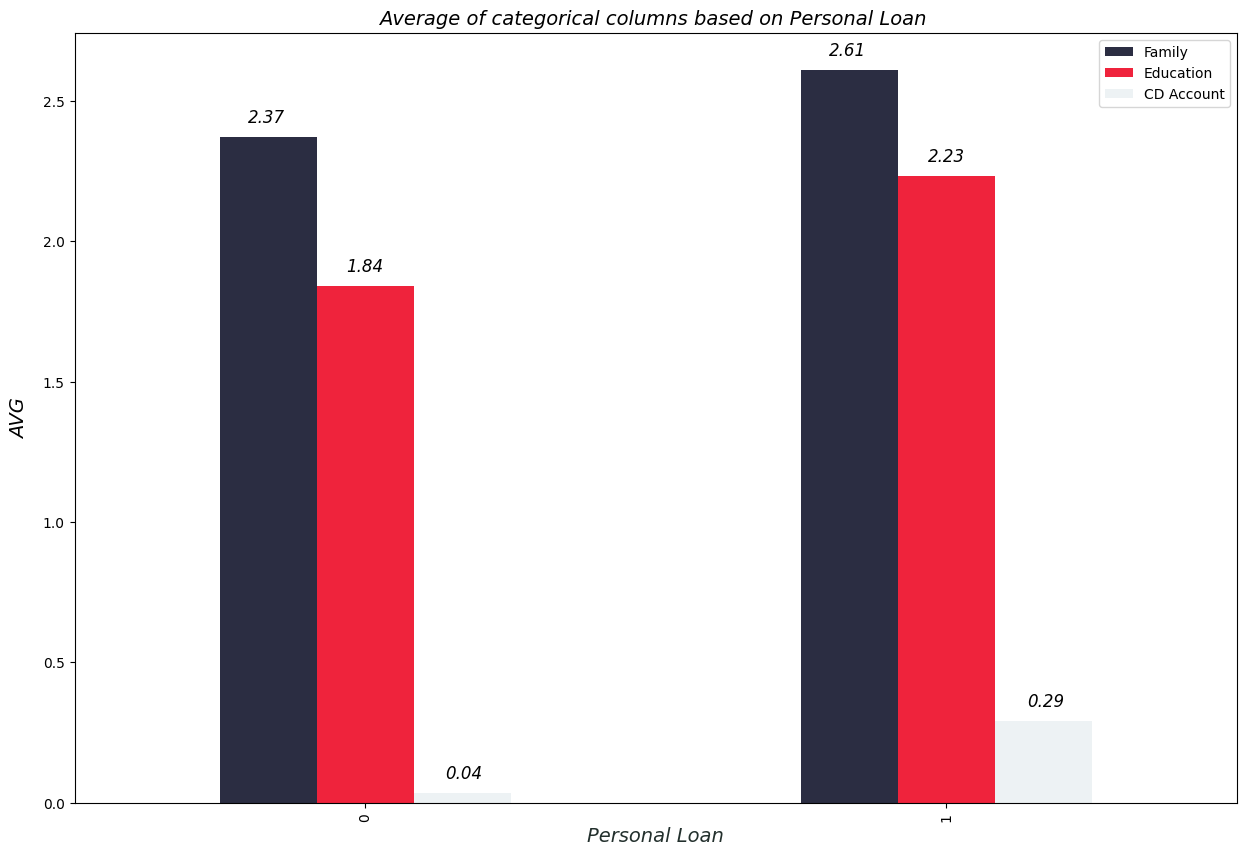

In [113]:
#Avg of numerical columns based on personal loan :
df_avg = df.groupby('Personal Loan')[['Age', 'Experience', 'Income','CCAvg', 'Mortgage']].mean()
cmap = ['#2b2d42' ,'#6d6875' , '#8d99ae' ,'#d80032']
df_avg.plot(kind='bar', figsize=(15, 10) , color = cmap) #Plotting
plt.ylabel('AVG' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
plt.xlabel('Personal Loan' , color = "#23302D" , fontsize=14 , fontstyle = "oblique")    
plt.title('Average of numerical columns based on Personal Loan ' , fontsize=14, fontstyle = "oblique" , color = 'black')
pading = [ -0.2 , -0.1 , 0, 0.1 , 0.2 , -0.2 , -0.1 , 0, 0.1 , 0.2]

for i , v in enumerate(df_avg.values.flatten()):
    
    plt.text( (i//5)+pading[i]  , v+5 , format(v, '.2f') , ha='center', va='top', fontstyle = "oblique" , fontsize = 12 )  
plt.show()

#Avg of categorical columns base on personal loan :

df_avg = df.groupby('Personal Loan')[['Family' , 'Education' , 'CD Account']].mean() #Mean of each column

cmap = ['#2b2d42' , '#ef233c' ,  '#edf2f4' ]
df_avg.plot(kind='bar', figsize=(15, 10) , color = cmap) #Plotting
plt.ylabel('AVG' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
plt.xlabel('Personal Loan' , color = "#23302D" , fontsize=14 , fontstyle = "oblique")
plt.title('Average of categorical columns based on Personal Loan ' , fontsize=14, fontstyle = "oblique" , color = 'black')

pading = [-0.17 , 0, 0.17 , -0.17 , 0, 0.17 ]
for i , v in enumerate(df_avg.values.flatten()):
    plt.text( (i//3)+pading[i]  , v+0.1 , format(v, '.2f') , ha='center', va='top', fontstyle = "oblique" , fontsize = 12 )  

plt.show()

##### Average of Age and Experience are pretty close in both situation as we discussed earlier and we can really determine if a customer accept the offer or not by these features.

##### but the average Income , CCAvg and mortgage of the customers that accept the loan, tends to be higher and almost double the average of customers that reject the loan offer.

##### And also we can see that in Familiy and Education the average of accepting is a bit higher

##### but in CD Account the difference is really significent.


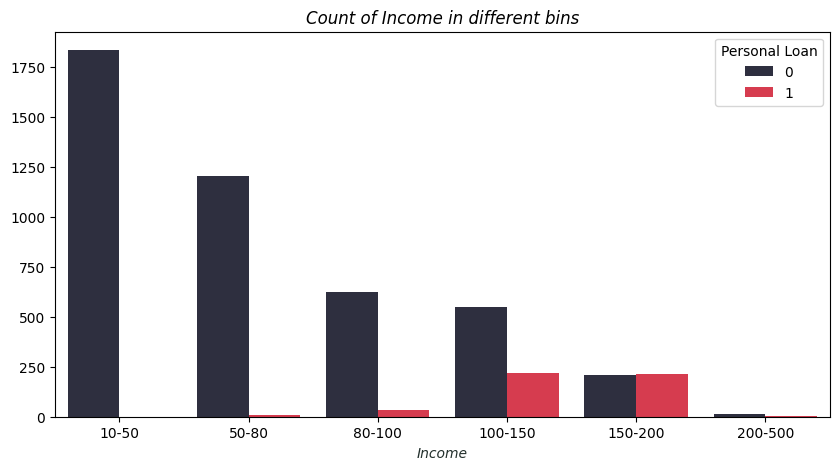

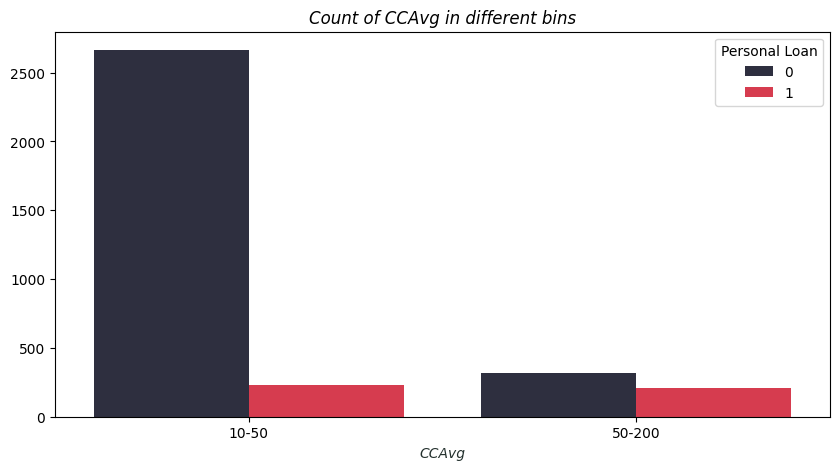

In [114]:
df['Personal Loan'] = df['Personal Loan'].astype(str)

#Count of Income in different bins :
dbins = pd.cut(df["Income"],bins=[10,50,80,100,150,200,500],labels=["10-50","50-80","80-100","100-150","150-200","200-500"])#Divide into bins

#plotting
plt.figure(figsize=(10,5))
sns.countplot(x=dbins , data=df , hue="Personal Loan" , palette = ['#2b2d42' , '#ef233c'])
plt.title('Count of Income in different bins' ,  fontsize=12, fontstyle = "oblique" , color = 'black')
plt.ylabel('') 
plt.xlabel('Income' , color = "#23302D" , fontsize=10 , fontstyle = "oblique")
plt.show()

#Count of CCAvg in different bins :
dbins = pd.cut(df["CCAvg"],bins=[10,50,200],labels=["10-50","50-200"])
plt.figure(figsize=(10,5))
sns.countplot(x=dbins,data=df,hue="Personal Loan" , palette = ['#2b2d42' , '#ef233c'])
plt.title('Count of CCAvg in different bins' ,  fontsize=12, fontstyle = "oblique" , color = 'black')
plt.ylabel('') 
plt.xlabel('CCAvg' , color = "#23302D" , fontsize=10 , fontstyle = "oblique")
plt.show()

##### Rejecting in lower income customers is so high and the acception in the range of 100 to 200 are the highest.

##### For CCAvg, the acceptence are pretty much the same in both bins. but rejections are significantly lower in the range of 50 to 200


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4993 non-null   int64  
 1   Experience          4993 non-null   int64  
 2   Income              4993 non-null   int64  
 3   ZIP Code            4993 non-null   int64  
 4   Family              4993 non-null   int64  
 5   CCAvg               4993 non-null   float64
 6   Education           4993 non-null   int64  
 7   Mortgage            4993 non-null   int64  
 8   Personal Loan       4993 non-null   int32  
 9   Securities Account  4993 non-null   int64  
 10  CD Account          4993 non-null   int64  
 11  Online              4993 non-null   int64  
 12  CreditCard          4993 non-null   int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 487.7 KB


### Logistic Regression

#### Normalizing Data


In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score , GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score,fbeta_score, make_scorer,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB , ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [117]:
def normal(df, features, rng):
    scaler = MinMaxScaler(feature_range = rng)
    norm = scaler.fit_transform(df[features])

    df_norm = pd.DataFrame(norm, columns=features)
    return df_norm

##### Create a df adding unseen data


In [118]:
features = ['Age','Experience','Income','Family',
           'CCAvg','Education','Mortgage','Securities Account','CD Account' , 'Online' , 'CreditCard' ]

df_norm = normal(df1, features, (1,2))
df_norm.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,1.507838,1.468391,1.304800,1.465385,1.193973,1.440216,1.089026,1.104546,1.060485,1.596836,1.293811
std,0.260483,0.265428,0.213114,0.382534,0.174817,0.419837,0.160256,0.305999,0.238407,0.490582,0.455552
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.272727,1.232558,1.143519,1.000000,1.070000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.500000,1.465116,1.259259,1.333333,1.150000,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,1.727273,1.697674,1.416667,1.666667,1.250000,2.000000,1.159055,1.000000,1.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [119]:
#Add unseen data for predicting later :
unseen_data = { 'Age' : 42 , 'Experience' : 16 , 'Income' : 30 , 'Family' : 3 , 'CCAvg' : 1.2*12 , 'Education' : 3 ,
               'Mortgage' : 0 , 'Securities Account' : 1 , 'CD Account' : 0 , 'Online' : 1 , 'CreditCard' : 1}

In [120]:
df_final = pd.concat([df1, pd.DataFrame([unseen_data])], ignore_index=True)
df_final = normal(df_final, features, (1,2))

In [121]:
pd.set_option('display.max_colwidth', None)

In [122]:
# X features and Y target
x = df_norm
y = df1['Personal Loan'].values.reshape(-1,1)
y = y.astype('int')

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

In [136]:
def train_save_and_evaluate(X_train, y_train, X_test, y_test, params, model_path='model.pkl'):
    classifier_name = params.get('classifier', 'knn')
    
    # Initialize the classifier
    if classifier_name == 'knn':
        model = KNeighborsClassifier(n_neighbors=params.get('n_neighbors', 5))
    elif classifier_name == 'decision_tree':
        model = DecisionTreeClassifier(max_depth=params.get('max_depth', None))
    elif classifier_name == 'random_forest':
        model = RandomForestClassifier(n_estimators=params.get('n_estimators', 100),
                                       max_depth=params.get('max_depth', None))
    elif classifier_name == 'svm':
        model = SVC(C=params.get('C', 1.0), kernel=params.get('kernel', 'rbf'))
    else:
        raise ValueError(f"Unsupported classifier: {classifier_name}")
    
    # Train the classifier
    model.fit(X_train, y_train)
    
    # Save the model
    joblib.dump(model, model_path)
    print(f'Model saved to {model_path}')
    
    # Load the model
    loaded_model = joblib.load(model_path)
    print(f'Model loaded from {model_path}')
    
    # Make predictions
    y_pred = loaded_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()

    return accuracy, cm


d:\anaconda\envs\myLLM\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model saved to model.pkl
Model loaded from model.pkl
Accuracy: 0.9419419419419419
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       882
           1       0.87      0.59      0.70       117

    accuracy                           0.94       999
   macro avg       0.91      0.79      0.84       999
weighted avg       0.94      0.94      0.94       999

Confusion Matrix:
[[872  10]
 [ 48  69]]


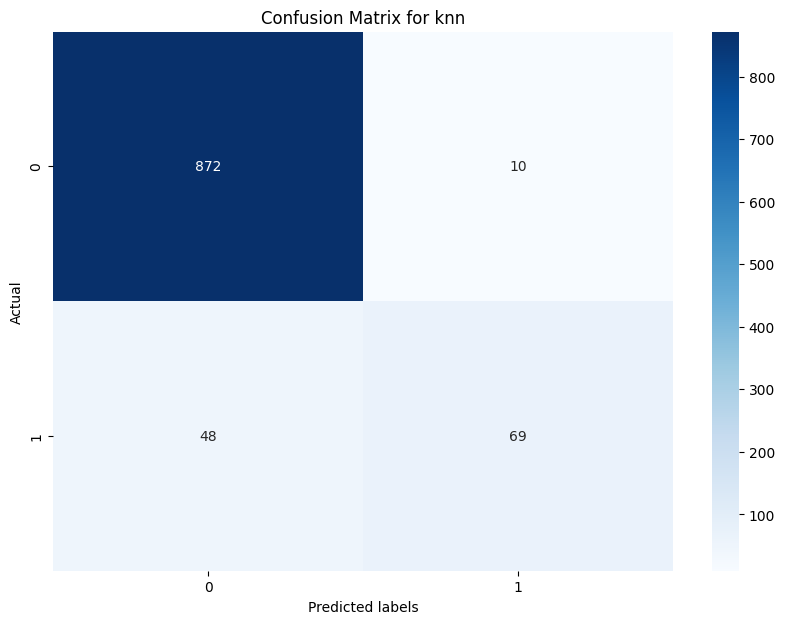

accuracy =  0.9419419419419419
cm : [[872  10]
 [ 48  69]]


In [138]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

params = {
    'classifier': 'knn',
    'n_neighbors': 3
}

accuracy,cm = train_save_and_evaluate(X_train, y_train, X_test, y_test, params)
print("accuracy = ", accuracy)



In [142]:
import numpy as np

def load_and_predict(model_path, unseen_data):
    # Load the saved model
    loaded_pipeline = joblib.load(model_path)
    print(f'Model loaded from {model_path}')
    
    # Create a DataFrame for the unseen data
    unseen_df = pd.DataFrame([unseen_data])
    
    # Predict using the loaded model
    prediction = loaded_pipeline.predict(unseen_df)
    
    return prediction

# Add unseen data for predicting later
unseen_data = {
    'Age': 42,
    'Experience': 16,
    'Income': 30,
    'Family': 3,
    'CCAvg': 1.2 * 12,
    'Education': 3,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
}

# Path to the saved model
model_path = 'model.pkl'

# Predict using the unseen data
prediction = load_and_predict(model_path, unseen_data)

# Output the prediction
result = "Will take personal loan" if prediction[0] == 1 else "Will not take personal loan"
print(f'Prediction for the unseen data Personal Loan: {result}')


Model loaded from model.pkl
Prediction for the unseen data Personal Loan: Will take personal loan


d:\anaconda\envs\myLLM\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
